In [1]:
%pip install 'vanna[chromadb,openai,postgres]'

Note: you may need to restart the kernel to use updated packages.


In [2]:
from vanna.openai.openai_chat import OpenAI_Chat
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore
import os
from dotenv import load_dotenv

In [4]:
load_dotenv()

OPEN_AI_API_KEY = os.getenv("OPEN_AI_API_KEY")
OPEN_AI_MODEL = os.getenv("OPEN_AI_MODEL")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

In [5]:
class MyVanna(ChromaDB_VectorStore, OpenAI_Chat):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        OpenAI_Chat.__init__(self, config=config)

vn = MyVanna(config={'api_key': OPEN_AI_API_KEY, 'model': OPEN_AI_MODEL})

In [7]:
vn.connect_to_postgres(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASSWORD, port=DB_PORT)

In [8]:
# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
vn.train(plan=plan)

In [9]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,7489660d-0823-419e-8625-73977eb539cf-sql,What are the top 5 NSE CODES?,SELECT nse_code\nFROM core_watchlist\nORDER BY...,sql
1,d907eb93-e38a-4724-9db0-f28e3a0c2231-sql,What are the top 5 NSE CODES?,SELECT nse_code\nFROM core_watchlist\nORDER BY...,sql
0,005803ac-4c63-4b82-92b8-cdd50595afa5-doc,None,The following columns are in the role_table_gr...,documentation
1,00706f6a-742a-4fe2-a263-a7fd2ecc04d6-doc,None,The following columns are in the table_constra...,documentation
2,008a3c18-28ea-49ae-a778-50174b2de4ed-doc,None,The following columns are in the pg_stat_progr...,documentation
...,...,...,...,...
1045,ff1e4423-b63a-4226-8056-867e708c3eff-doc,None,The following columns are in the pg_seclabels ...,documentation
1046,ffb3ddb1-64d0-47bc-9b8e-3fa8089c2307-doc,None,The following columns are in the pg_timezone_a...,documentation
1047,ffe1f859-70fe-47a0-b5cd-a423727ec19b-doc,None,The following columns are in the pg_user_mappi...,documentation
1048,ffe849af-b217-4b3c-b36c-44dd9da6be40-doc,None,The following columns are in the foreign_table...,documentation


Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Using model gpt-4 for 3229.25 tokens (approx)
SELECT nse_code
FROM core_watchlist
ORDER BY nse_code DESC
LIMIT 5;
  nse_code
0     None
1     None
2     None
3     None
4     None
Using model gpt-4 for 168.75 tokens (approx)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


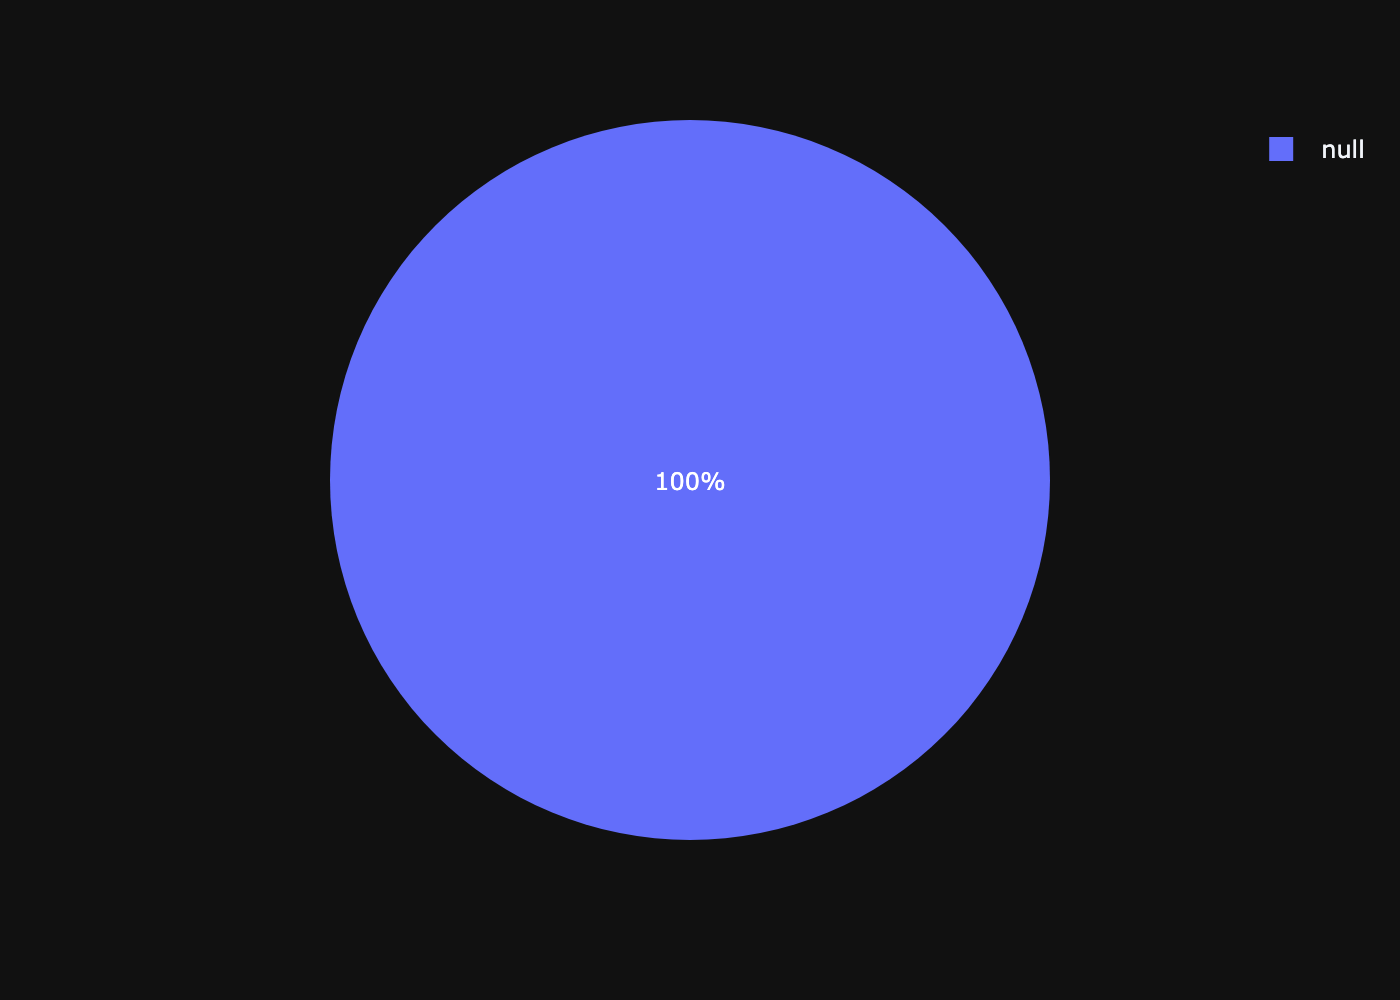

In [10]:
vn.ask(question='What are the top 5 NSE CODES?')